<a href="https://colab.research.google.com/github/zawarudobngdev/learning_machine_learning/blob/master/Handwritten%20Digit%20Classification%20Model/Final_Handwritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Classification Model

#### A model made for the Izycode Machine Learning Internship Program

It is a model that recognizes handwritten digits (0-9) using the MNIST dataset, a foundational task in image classification. It accurately classifies images of handwritten digits, setting the stage for more advanced image
recognition applications.

I have separeted this task into 3 steps across 3 notebooks to better showcase the developing process.

This notebook is the final version where the model is already trained and saved. It then loads the model, prepares the data and makes the prediction.

## Evaluating the model

Evaluating the model on the test dataset

In [ ]:
# importing modules
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# load train and test dataset
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = mnist.load_data()
  # reshape dataset to have a single channel
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))

  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)

  return trainX, trainY, testX, testY

In [ ]:
# scale pixels
def prep_pixels(train, test):
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 # return normalized images
 return train_norm, test_norm

Inside the run_test_harness function we load the model and evaluate it.

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
 # load dataset
 trainX, trainY, testX, testY = load_dataset()
 # prepare pixel data
 trainX, testX = prep_pixels(trainX, testX)
 # load model
 model = load_model('final_model.keras')
 # evaluate model on test dataset
 _, acc = model.evaluate(testX, testY, verbose=0)
 print('> %.3f' % (acc * 100.0))

In [ ]:
# entry point, run the test harness
run_test_harness()

> 99.320


## Prediction

Now we can make predictions.

Here we take a random image of a handwritten digit and plot it to showcase, in this case it is the number 7.

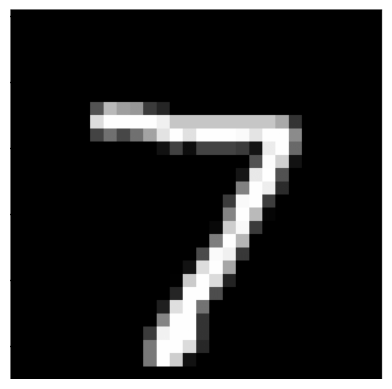

In [ ]:
# make a prediction for a new image.

img = mpimg.imread('sample_image.png')
plt.imshow(img)
plt.axis('off')
plt.show()

Load and prepare the image

In [ ]:
# load and prepare the image
def load_image(filename):
 # load the image
 img = load_img(filename, color_mode='grayscale', target_size=(28, 28))
 # convert to array
 img = img_to_array(img)
 # reshape into a single sample with 1 channel
 img = img.reshape(1, 28, 28, 1)
 # prepare pixel data
 img = img.astype('float32')
 img = img / 255.0
 return img

And run the example.

In [ ]:
# load an image and predict the class
def run_example():
 # load the image
 img = load_image('sample_image.png')
 # load model
 model = load_model('final_model.keras')
 # predict the class
 predict_value = model.predict(img)
 digit = argmax(predict_value)
 print(digit)

In [ ]:
# entry point, run the example
run_example()

1/1 [==============================] - 0s 65ms/step
7


As we can see, the predicted number is indeed the digit 7.